<a href="https://colab.research.google.com/github/sonchangwoo95/github-slideshow/blob/master/LSTM_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [8]:
data = pd.read_csv('sample_data/005930.KS.filter.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-04,25580,26100,25580,26100,22694.39844,9402300
1,2016-04-05,25980,25980,25200,25200,21911.83789,11815950
2,2016-04-06,25380,25820,25360,25700,22346.59375,9211700
3,2016-04-07,26000,26000,25160,25380,22068.34766,12939750
4,2016-04-08,25380,25380,24800,24920,21668.37109,12593400


In [9]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [10]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [15]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

ZeroDivisionError: ignored

In [16]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
89/89 [==============================] - 7s 47ms/step - loss: 0.0032 - val_loss: 0.0081
Epoch 2/20
89/89 [==============================] - 3s 38ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 3/20
89/89 [==============================] - 3s 39ms/step - loss: 7.1846e-04 - val_loss: 0.0011
Epoch 4/20
89/89 [==============================] - 3s 39ms/step - loss: 5.4860e-04 - val_loss: 0.0012
Epoch 5/20
89/89 [==============================] - 3s 38ms/step - loss: 4.2805e-04 - val_loss: 0.0020
Epoch 6/20
89/89 [==============================] - 3s 39ms/step - loss: 3.6055e-04 - val_loss: 4.6959e-04
Epoch 7/20
89/89 [==============================] - 3s 39ms/step - loss: 2.6326e-04 - val_loss: 5.2949e-04
Epoch 8/20
89/89 [==============================] - 3s 39ms/step - loss: 2.7844e-04 - val_loss: 5.7743e-04
Epoch 9/20
89/89 [==============================] - 3s 38ms/step - loss: 2.6312e-04 - val_loss: 0.0010
Epoch 10/20
89/89 [==============================] - 3s 38ms/step - l

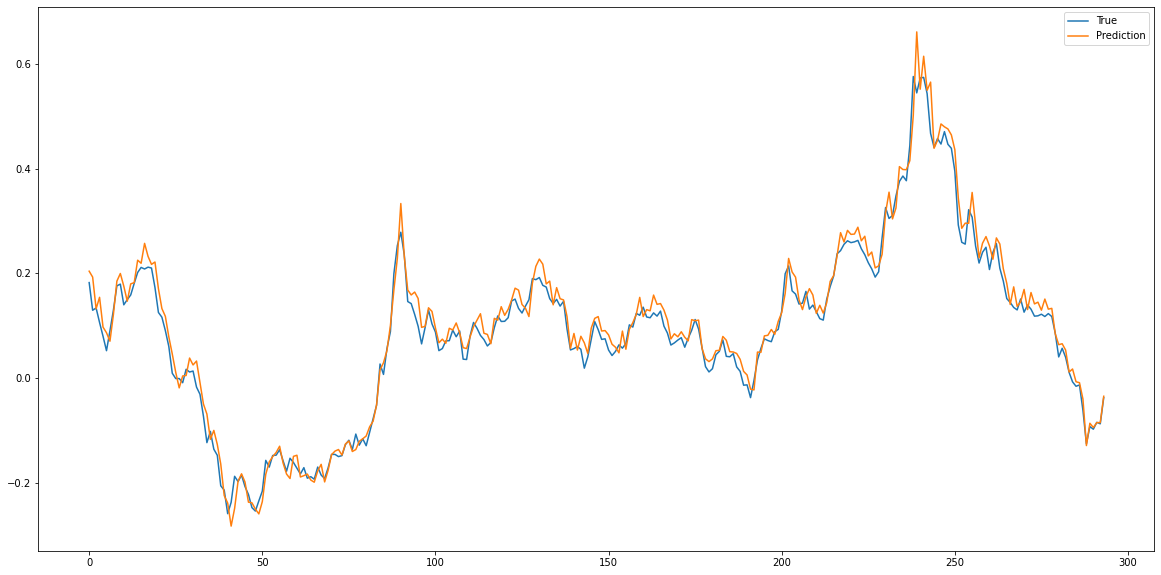

In [18]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

# 실제추적되는 그래프가 아님